#### Importing Libraries

We will start off by importing the libraries which we will be using for the statitsical analysis. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#### Reading Excel files and sheets into dataframes

In [2]:
xls = pd.ExcelFile('Abalone Data Set.xlsx')

In [8]:
df = pd.read_excel(xls)

In [9]:
df.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [13]:
df.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight","Shucked weight","Viscera weight","Shell weight", "Rings"]


In [14]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [17]:
total_rows,total_columns=df.shape
print("Dataset Shape : {} X {}".format(total_rows,total_columns))

Dataset Shape : 4176 X 9


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4176.0,0.524009,0.120103,0.0750,0.450000,0.54500,0.61500,0.8150
Diameter,4176.0,0.407892,0.099250,0.0550,0.350000,0.42500,0.48000,0.6500
Height,4176.0,0.139527,0.041826,0.0000,0.115000,0.14000,0.16500,1.1300
Whole weight,4176.0,0.828818,0.490424,0.0020,0.441500,0.79975,1.15325,2.8255
Shucked weight,4176.0,0.359400,0.221980,0.0010,0.186000,0.33600,0.50200,1.4880
Viscera weight,4176.0,0.180613,0.109620,0.0005,0.093375,0.17100,0.25300,0.7600
Shell weight,4176.0,0.238852,0.139213,0.0015,0.130000,0.23400,0.32900,1.0050
Rings,4176.0,9.932471,3.223601,1.0000,8.000000,9.00000,11.00000,29.0000


In [19]:
df.dtypes.value_counts()

float64    7
int64      1
object     1
dtype: int64

In [21]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [22]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [23]:
corr_matrix=df.corr()
corr_matrix

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


In [32]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [43]:
df.all()
#It returns True if all elements are non-zero

Sex                True
Length             True
Diameter           True
Height            False
Whole weight       True
Shucked weight     True
Viscera weight     True
Shell weight       True
Rings              True
dtype: bool

In [49]:
df.isin([0]).sum()

Sex               0
Length            0
Diameter          0
Height            2
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [101]:
drop_A=df.index[df["Height"] == 0]
drop_A

Int64Index([1256, 3995], dtype='int64')

In [102]:
df.loc[[1256,3995], :]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1256,Infant,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3995,Infant,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [100]:
df.replace(to_replace =["M","F","I"],  
                 value =["Male", "Female", "Infant"], inplace=True)

## Correlation findings before Data analysis and cleaning

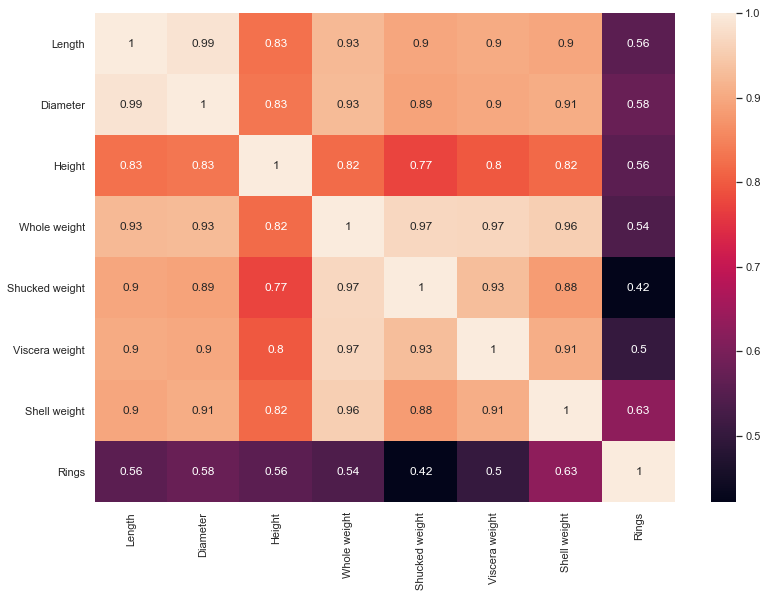

In [201]:
plt.figure(figsize=(13,9))
sns.heatmap(corr_matrix,annot=True)

We examin a strong correlation between Diameter and Shell weight attribute with the Rings attribute. We will see if this correlation is right after Exploratory data analysis.

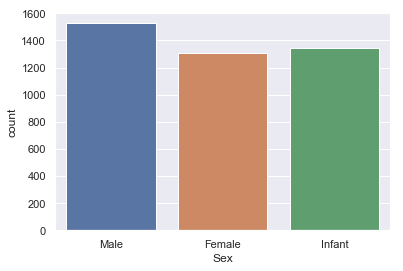

In [106]:
sns.countplot(df.Sex)

From the figure, we can infer that there are more number of males than females in the dataset.

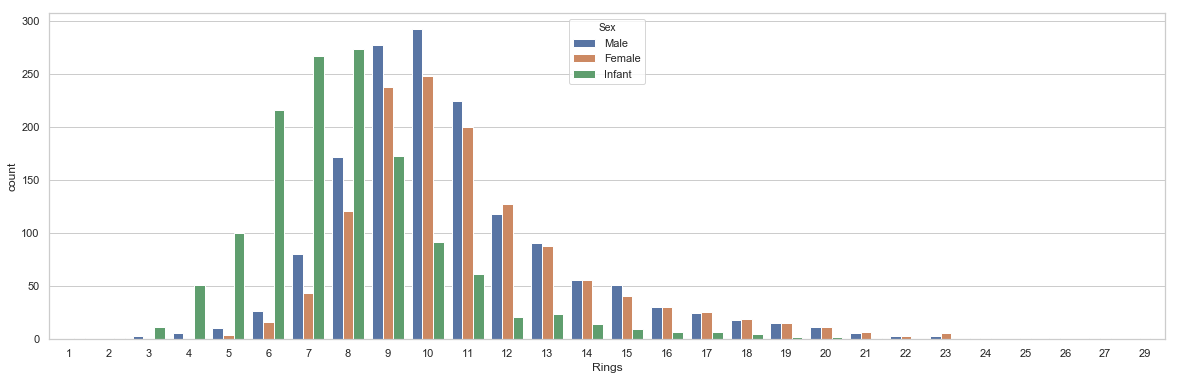

In [194]:
plt.figure(figsize=(20,6))
sns.countplot(df.Rings, hue=df['Sex'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D3C33790B8>,
      dtype=object)

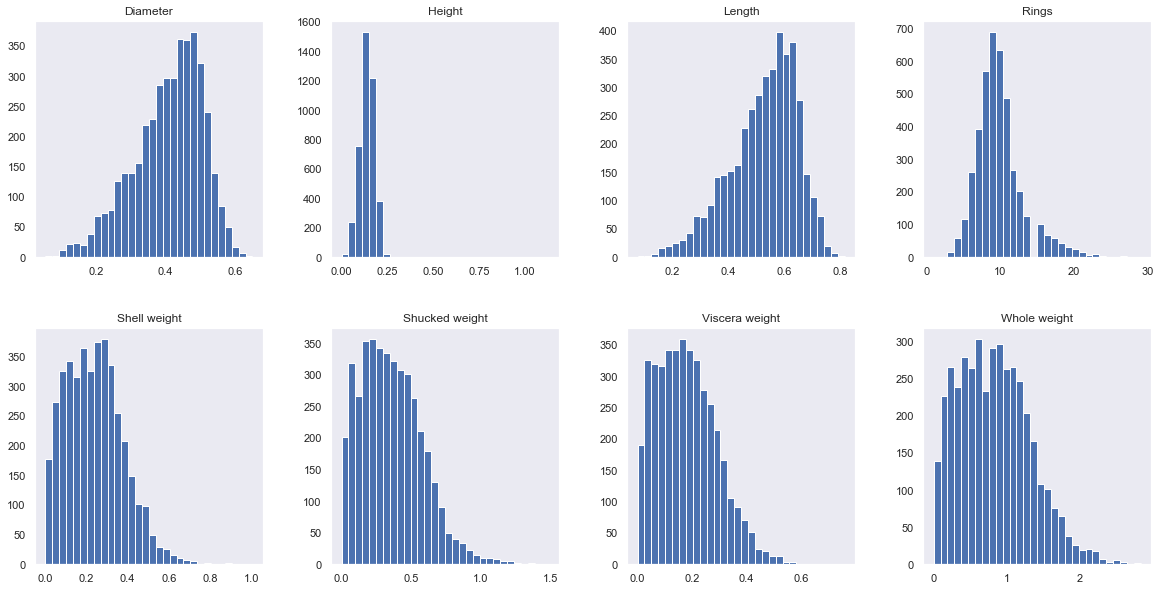

In [125]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)


**From this we can easily analyze the attributes of an abalone. For each of these attributes we plotted histograms.Between the variables that are Length, Height and Diameter, representing the dimensions, we observe normal distribution. But, we also notice the peak formed in the Height histogram. In order to visuaize this, we use boxplot to see the presence of outliers, if any**.

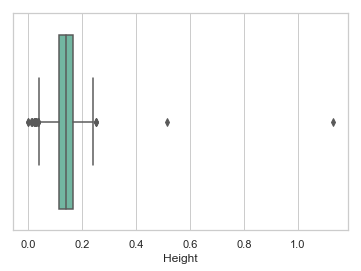

In [161]:
sns.set(style="whitegrid")
sns.boxplot(df['Height'], palette="Set2")

We can clearly see that due to the presence of two outliers that lie far beyond the normal distribution.
Thus, we need to filter them in order to obtain a more better visualization of the Height attribute.

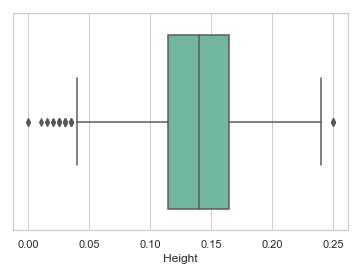

In [175]:
# removing outliers 
df_h = df[df['Height'] < 0.4]
#plt.figure(figsize=(15, 15))
colors = sns.color_palette()
sns.boxplot(df_h['Height'], palette="Set2")

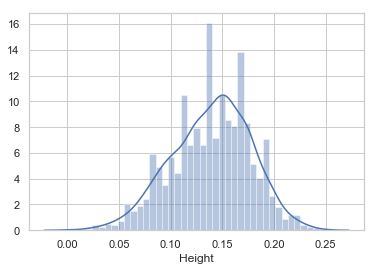

In [177]:
sns.distplot(df_h['Height'])

When matplotlib gives you extra room to the right of the distribution, that means you have outliers and hence we successfully removed them because the aim is to use normal distribution rather than skewed distribution(right or left)

## Correlation findings

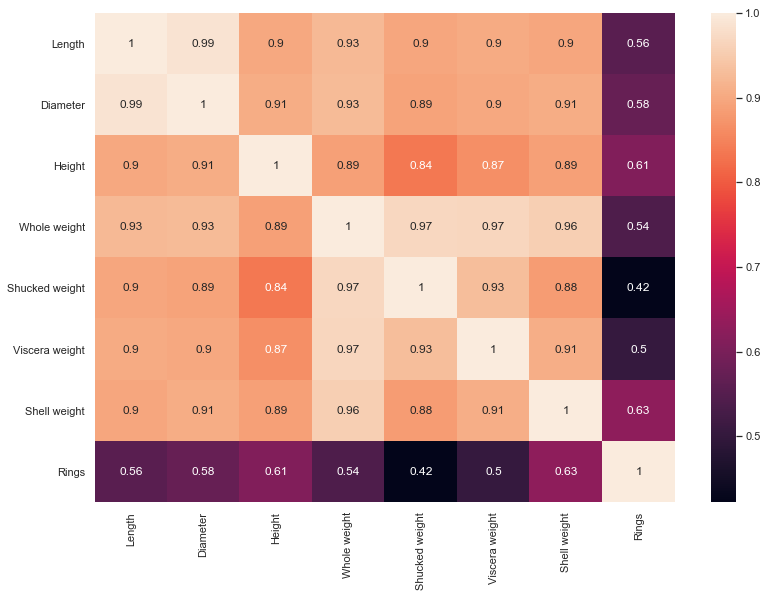

In [178]:
plt.figure(figsize=(13, 9))
hcorr = df_h.corr()
sns.heatmap(hcorr, annot=True)

Now, on analyzing this correlation matrix, we can observe that "Height" and "Shell weight" are the most correlating attributes to Rings, rather than the "Diameter". 
Therefore, we will be concentrating our analysis on the relationship of these two attributes with Rings.
Rings is least correlated with Shucked Weight

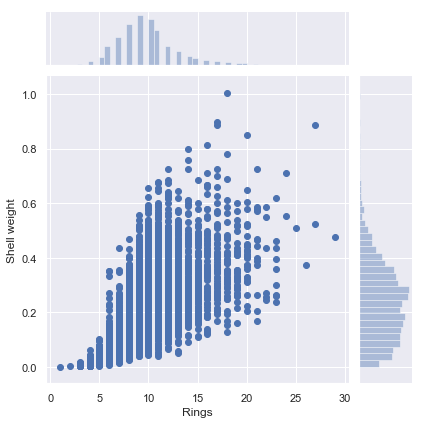

In [127]:
sns.jointplot(x="Rings", y="Shell weight", data=df)

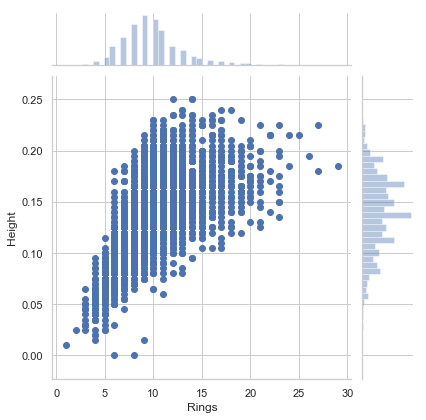

In [170]:
sns.jointplot(x="Rings", y="Height", data=df)

We notice an interesting pattern: for lower values of Rings we have concentrated values of Height and Shell weight. As the value of Rings increases, the scatterplot becames larger, and for the highest values of Rings it become disperse.

## Correlation analysis on the basis of 'Rings'

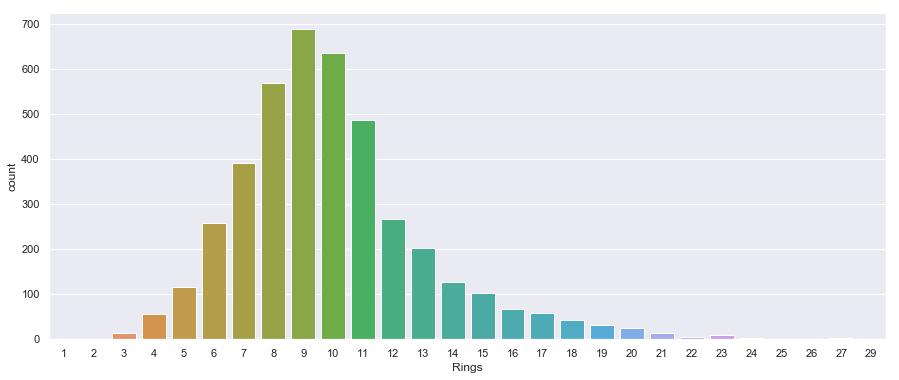

In [120]:
plt.figure(figsize=(15,6))
sns.countplot(df.Rings)

Based on this barplot, we observe the most number of ablones lie between 7 to 10. 
To investigate variation of correlation regarding the number of rings, we delimit the by Rings < 10. Now lets check the correlation among different attributes. has greater correlation between the independent attributes and the target variable.


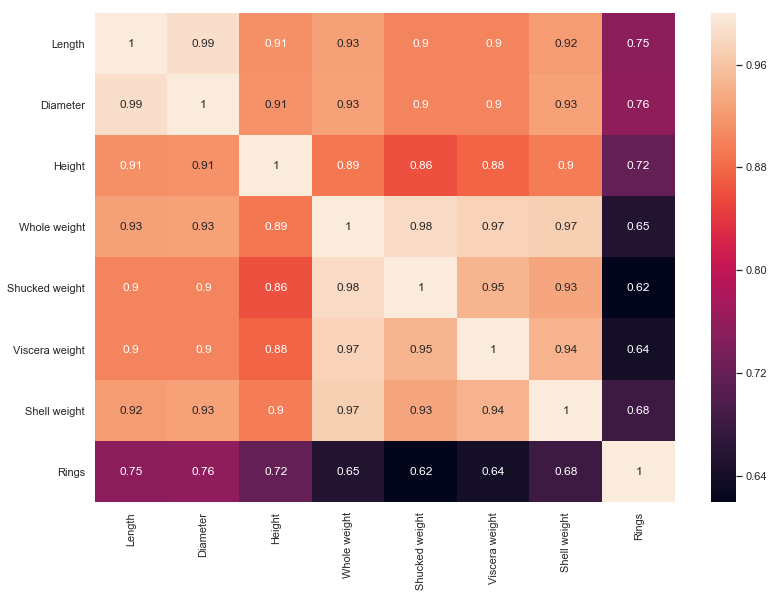

In [179]:
ring_df = df[df['Rings'] < 10]
plt.figure(figsize=(13, 9))
corr = ring_df.corr()
sns.heatmap(corr, annot=True)

<Figure size 1080x360 with 0 Axes>

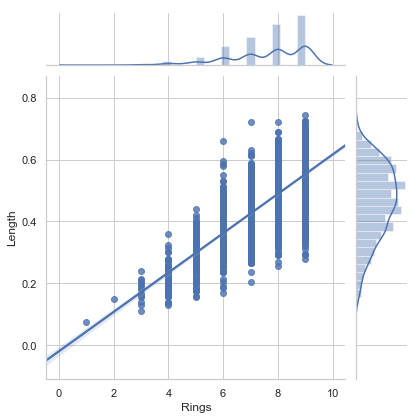

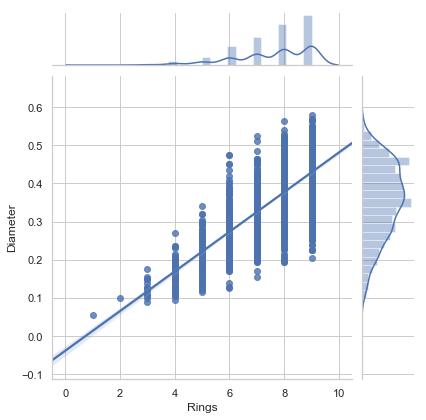

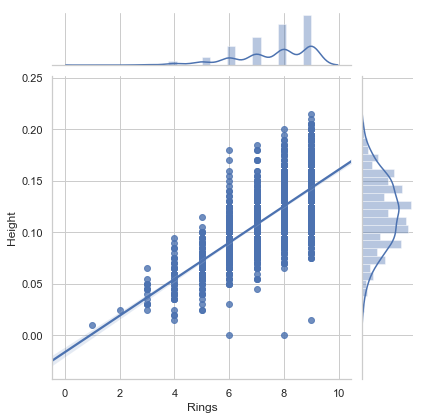

In [195]:
plt.figure(figsize=(15, 5))

sns.jointplot(data=ring_df, x='Rings', y='Length',  kind='reg')
sns.jointplot(data=ring_df, x='Rings', y='Diameter', kind='reg')
sns.jointplot(data=ring_df, x='Rings', y='Height', kind='reg')

From the results, we can conclude that abalones grows in size and weight until a certain age which is near 10 years. 
After this age their size and age remains stable in function of age, depending more on environmental factors.

In [139]:
a=df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']].mean().sort_values('Rings').reset_index()
a

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,Infant,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
1,Male,0.561460,0.439335,0.151418,0.991772,0.433083,0.215620,0.282056,10.702685
2,Female,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304


[Text(0, 0, '7.89'), Text(0, 0, '10.70'), Text(0, 0, '11.13')]

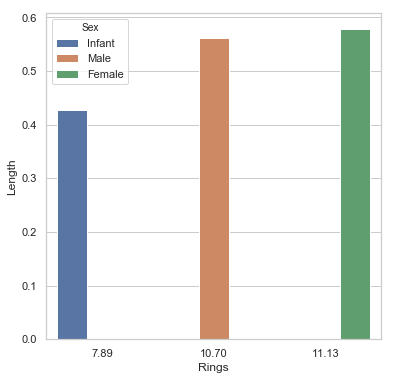

In [228]:
import matplotlib.ticker as tick
fig, ax1 =plt.subplots(figsize=(6,6))
sns.barplot(y='Length', x='Rings',hue="Sex", data=a, ax=ax1, dodge=True)
ax1.set_xticklabels(['{:.2f}'.format(float(t.get_text())) for t in ax1.get_xticklabels()])


[Text(0, 0, '7.89'), Text(0, 0, '10.70'), Text(0, 0, '11.13')]

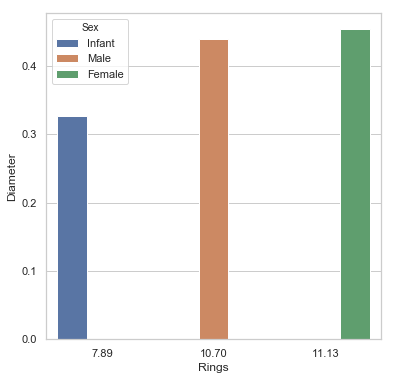

In [231]:
fig, ax1=plt.subplots(figsize=(6,6))
sns.barplot(y='Diameter', x='Rings',hue="Sex", data=a, ax=ax1, dodge=True)
ax1.set_xticklabels(['{:.2f}'.format(float(t.get_text())) for t in ax1.get_xticklabels()])


[Text(0, 0, '7.89'), Text(0, 0, '10.70'), Text(0, 0, '11.13')]

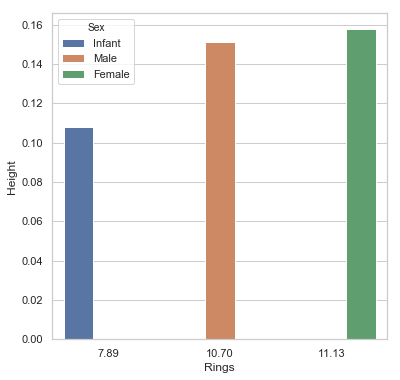

In [232]:
fig, ax1=plt.subplots(figsize=(6,6))
sns.barplot(y='Height', x='Rings',hue="Sex", data=a, dodge=True)
ax1.set_xticklabels(['{:.2f}'.format(float(t.get_text())) for t in ax1.get_xticklabels()])


[Text(0, 0, '7.89'), Text(0, 0, '10.70'), Text(0, 0, '11.13')]

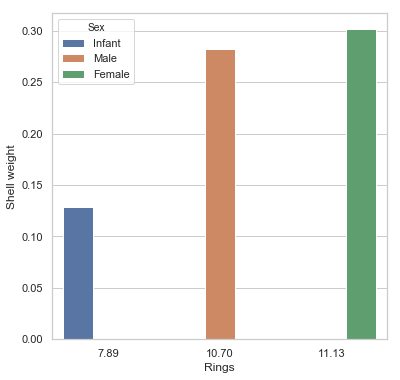

In [233]:
fig, ax1=plt.subplots(figsize=(6,6))
sns.barplot(y='Shell weight', x='Rings',hue="Sex", data=a, dodge=True)
ax1.set_xticklabels(['{:.2f}'.format(float(t.get_text())) for t in ax1.get_xticklabels()])


F:\ANACONDA\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


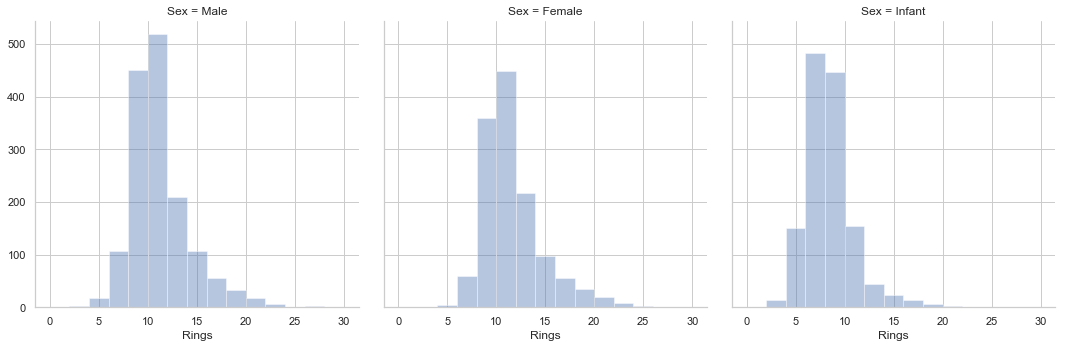

In [234]:
g = sns.FacetGrid(df, col='Sex', margin_titles=True, size=5)
g.map(sns.distplot, 'Rings', kde=False, bins=range(0, 31, 2))

*We basically observed that there’s no drastic differences in size, weight and numbers of rigns between male/female abalones. Secondly, the Infant Abalones groups have lower mean values of size, weight and number of rings*